### Data Analysis of World Happiness Dataset

## What will we do in this project?
* Bivariate data analysis
* Multivariate data analysis
* Seaborn library visualization techniques: bar, box, kde, swarm, heatmap, clustermap
* Plotly library visualization techniques: animated plot and world map

## Introduction

* The world happiness report is a landmark survey of the state of global happiness.
* The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.

## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Data Distribution in 2021](#4)
5. [Happiest and Unhappiest Countries in 2021](#5)
6. [Ladder Score Distribution by Regional Indicator](#6)
7. [Ladder Score Distribution by countries in Map View](#7)
8. [Most Generous and Most Ungenerous Countries in 2021](#8)
9. [Generous Distribution by Countries in Map View](#9)
10. [Generous Distribution by Regional Indicator in 2021](#10)
11. [Relationship Between Happiness and Income](#11)
12. [Relationship Between Happiness and Freedom](#12)
13. [Relationship Between Happiness and Corruption](#13)
14. [Relationship Between Features](#14)


<a id='1'></a>
## Python Libraries
* In this section, we import used libraries during this notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#We should import plotly library to use world map
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


<a id='2'></a>
## Data Content

* The happiness scores and rankings use data from the Gallup World Poll.
    * Gallup World Poll: It consist of more than 100 global questions as well as region-specific items.
* The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

* **Ladder Score:** Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita:** The GDP-per-capita time series for 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support:** Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy:** Healty life expectancy is the average life in good health
* **Freedom to make life chocies:** Freedom to make life choices is the national average of binary responses to the GWP question "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?
* **Generosity:** Generosity is the residual of regressing natinal average of response to the GWP question "Have you donated money to a charity in the past month? on GDW per capita.
* **Perception of corruption:** The measure is the national average of the survey responses to two questions in the GWP: "Is corruption widespread throughout  the government or not" and "Is corruption widespread within businesses or not?"
* **Ladder score in Dystopia:** It has values equal to the world's lowest national averages.


<a id='3'></a>
## Read and Data Analyse

In [2]:
# read data
df=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
#show first five row of data
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
#some basics informations about data:
#DataFrame shape
df.shape

(1949, 11)

In [5]:
#Dataframe number of dimensions
df.ndim

2

In [6]:
#describe basic statistics of data
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [7]:
#show simpler view of descriptions of basic statistics of data 
# we use transpose 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [8]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [9]:
#There are missing values in Log GDP per capita, Social support,Healthy life expectancy at birth, Freedom to make life choices
# Generosity, Perceptions of corruption, positive and negative affect
# we should handle these missing values
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [10]:
# read data
df2021=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")

In [11]:
#show first five row of df2021
df2021.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [12]:
#basic statistics informations of df2021
df2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924e+00,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,2.200120e-02,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330e+00,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879e+00,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601e+00,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,1.148890e-01,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043e+00,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,1.133318e-01,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,1.506567e-01,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,1.792263e-01,0.082,0.667,0.781,0.845,0.939


In [13]:
#information about df2021
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

<a id='4'></a>
## Data Distribution in 2021
* Unique Countries
* Count Regional Indicator
* Distribution of Remaining Features

In [14]:
df2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [15]:
#unique countries
df2021['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

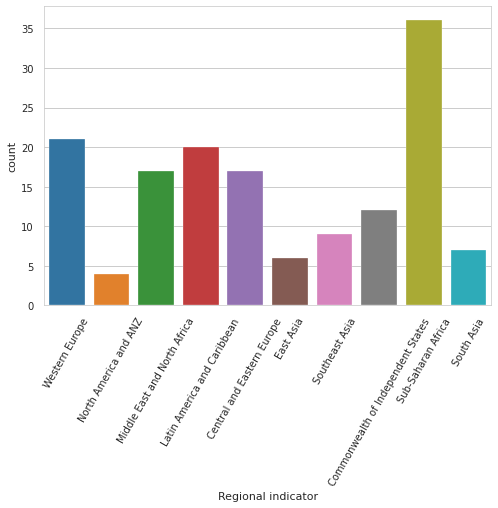

In [16]:
#count regional indicator
#how many country in a region
sns.countplot(df2021["Regional indicator"])
plt.xticks(rotation=60)
plt.show()

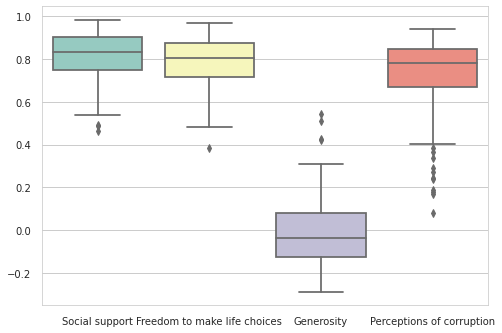

In [17]:
# we split features in three sets
#distribution of feature set 1 with boxplot
# we select four features for set1. because their values close to each other. 
# If we choose variables whose value ranges are very different from each other, it will be difficult to interpret the graph. 
list_features=["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data=df2021.loc[:,list_features],orient='v', palette='Set3')
plt.show()

* there is the most outlier in "perception of corruption". There is so much corruption in some countries that it appears as an outlier in the world average.
* looking at the chart, some countries are very generous

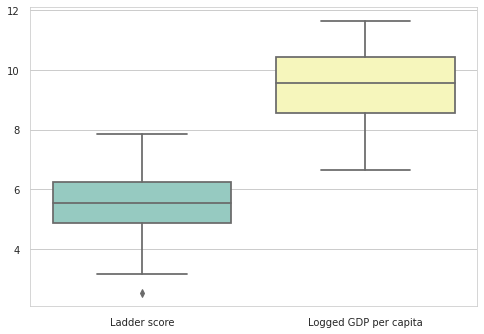

In [18]:
#distribution of feature set 2
list_features=["Ladder score", "Logged GDP per capita"]
sns.boxplot(data=df2021.loc[:,list_features],orient='v', palette='Set3')
plt.show()

* As shown in plot, there are outliers in Ladder score. That is some countries are very unhappy compared to the world average. 

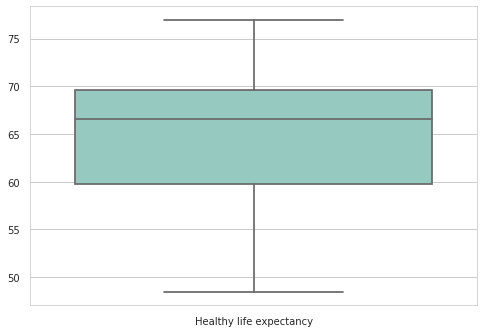

In [19]:
#distribution of feature set 3
list_features=["Healthy life expectancy"]
sns.boxplot(data=df2021.loc[:,list_features],orient='v', palette='Set3')
plt.show()

## Explanation of plot
* Life expectancy is between 60 and 70. 
* Median is average 67

## Questions about distributions
* According to these distributions we have obtained, we can look at a few things. 
    * Which country has the most corruption or the most generous and ungenerous?
    * Which country is the happiest or which country is the unhappiest?


<a id=5></a>
## Happiest and Unhappiest Countries in 2021

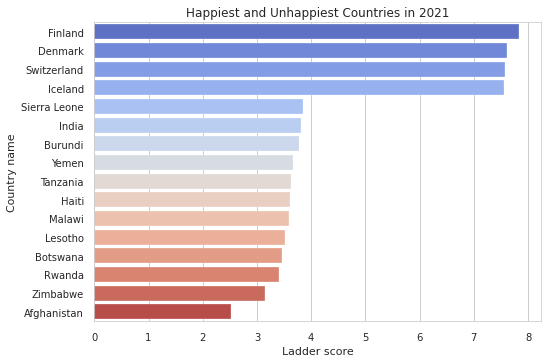

In [20]:
# We specified two value from distribution of feature set 2("Ladder score")

df2021_happiest_unhappiest=df2021[(df2021.loc[:,"Ladder score"] > 7.5) | (df2021.loc[:, "Ladder score"] < 4)]
sns.barplot(x="Ladder score", y="Country name", data=df2021_happiest_unhappiest, palette="coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

**We can deduce that western European countries are happier.**

<a id=6></a>
## Ladder Score Distribution by Regional Indicator

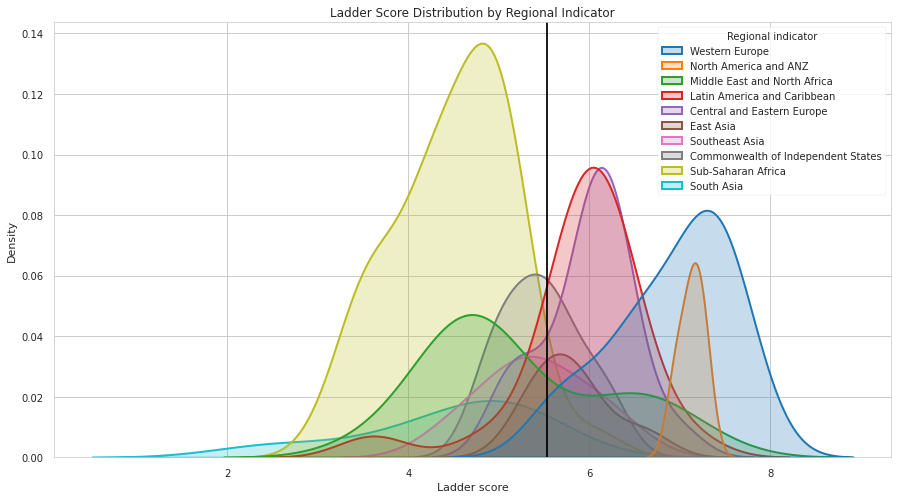

In [21]:
#kernel density estimation plot
# we added new dimension with hue parameter. That is hue is our classes. 
#Ladder scores are splitted by regional indicators
plt.figure(figsize=(15,8))
sns.kdeplot(df2021["Ladder score"], hue=df2021["Regional indicator"], fill=True, linewidth=2)
#we can draw a line to split plot into two parts
plt.axvline(df2021["Ladder score"].mean(), c="black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

* According to the plot, the unhappiest region south asia. The highest value of ladder score is in western europe as we said before. Second happiest region North America
* The country with the lowest standard deviation is North America and ANZ. 

<a id=7></a>
## Ladder Score Distribution by countries in Map View

In [22]:
# to use world map we should import plotly library

fig=px.choropleth(df.sort_values("year"),
                  locations="Country name",
                  color="Life Ladder",
                  locationmode="country names",
                  animation_frame="year")
fig.update_layout(title="Life Ladder Comparison by Countries")
fig.show()

<a id=8></a>
## Most Generous and Most Ungenerous Countries in 2021

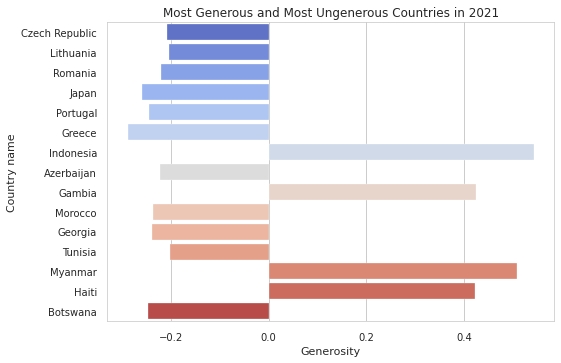

In [23]:
#From the generosity we took the greater than 0.4 and less than -0.2 
df2021_g=df2021[(df2021.loc[:,"Generosity"] > 0.4) | (df2021.loc[:,"Generosity"] < -0.2)]
sns.barplot(x="Generosity", y="Country name", data=df2021_g, palette="coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2021")
plt.show()

 * **The most generous Country is Indonesia.**
 * **The most ungenerous Country is Greece.**

<a id=9></a>
## Generous Distribution by Countries in Map View

In [24]:
fig=px.choropleth(df.sort_values("year"),
                 locations="Country name",
                 color="Generosity",
                 locationmode="country names",
                 animation_frame="year")
fig.update_layout(title="Generosity Comparison by Countries")
fig.show()

<a id=10></a>
## Generous Distribution by Regional Indicator in 2021

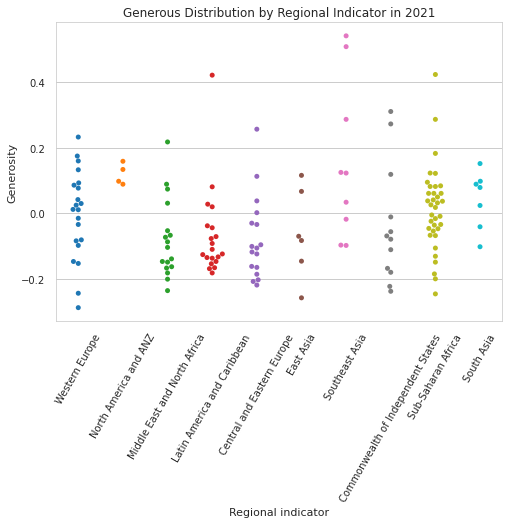

In [25]:
sns.swarmplot(x="Regional indicator", y="Generosity", data=df2021)
plt.xticks(rotation=60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show();


<a id=11></a>
## Relationship Between Happiness and Income

In [26]:
# we will import new dataset about population

pop=pd.read_csv("/kaggle/input/world-population-19602018/population_total_long.csv")
pop.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [27]:
df["Country name"].value_counts()

Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: Country name, Length: 166, dtype: int64

In [28]:
#we will combine df2021 and pop dataframes
country_continent={}
for i in range(len(df2021)):
    country_continent[df2021["Country name"][i]]=df2021["Regional indicator"][i]
# we converted the index that are country name to list
all_countries=df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_2021=df2021["Country name"].value_counts().reset_index()["index"].tolist()

#Prints countries that are not in the 2021 dataset
for x in all_countries:
    if x not in all_countries_2021:
        print(x)

Congo (Kinshasa)
Syria
Trinidad and Tobago
Sudan
Qatar
Central African Republic
Somaliland region
Djibouti
South Sudan
Angola
Bhutan
Somalia
Belize
Suriname
Cuba
Oman
Guyana


In [29]:
# We need to assign the regions of these countries. 
# we did by for
region=[]
for i in range(len(df)):
    if df["Country name"][i]== "Angola":
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i]== "Belize":
        region.append("Latin America and Caribbean")
    elif df["Country name"][i]== "Congo (Kinshasa)":
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i]== "Syria":
        region.append("Middle East and North Africa")
    elif df["Country name"][i]== "Trinidad and Tobago":
        region.append("Latin America and Caribbean")
    elif df["Country name"][i]== "Cuba":
        region.append("Latin America and Caribbean")
    elif df["Country name"][i]== "Qatar":
        region.append("Middle East and North Africa")
    elif df["Country name"][i]== "Sudan":
        region.append("Middle East and North Africa")
    elif df["Country name"][i]== "Central African Republic":
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i]== "Djibouti":
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i]== "Somaliland region":
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i]== "South Sudan":
        region.append("Middle East and North Africa")
    elif df["Country name"][i]== "Somalia":
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i]== "Oman":
        region.append("Middle East and North Africa")
    elif df["Country name"][i]== "Guyana":
        region.append("Latin America and Caribbean")
    elif df["Country name"][i]== "Bhutan":
        region.append("South Asia")
    elif df["Country name"][i]== "Suriname":
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent[df['Country name'][i]])
df['region']=region

In [30]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [31]:
# we need add population
all_countries=df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_pop=pop["Country Name"].value_counts().reset_index()["index"].tolist()

del_country=[]
#we will del countries that are not in the pop dataset
for x in all_countries:
    if x not in all_countries_pop:
        del_country.append(x)
del_country


['Egypt',
 'South Korea',
 'Kyrgyzstan',
 'Russia',
 'Venezuela',
 'Palestinian Territories',
 'Taiwan Province of China',
 'Iran',
 'Yemen',
 'Slovakia',
 'Hong Kong S.A.R. of China',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Laos',
 'Congo (Kinshasa)',
 'Syria',
 'North Cyprus',
 'Somaliland region',
 'Swaziland',
 'Gambia']

In [32]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

In [33]:
pop_df=df[['Log GDP per capita','Life Ladder','Country name', 'year','Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity','region','Perceptions of corruption']].copy()
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption
0,7.370,3.724,Afghanistan,2008,0.451,50.80,0.718,0.168,South Asia,0.882
1,7.540,4.402,Afghanistan,2009,0.552,51.20,0.679,0.190,South Asia,0.850
2,7.647,4.758,Afghanistan,2010,0.539,51.60,0.600,0.121,South Asia,0.707
3,7.620,3.832,Afghanistan,2011,0.521,51.92,0.496,0.162,South Asia,0.731
4,7.705,3.783,Afghanistan,2012,0.521,52.24,0.531,0.236,South Asia,0.776


In [34]:
pop_df=pop_df[~pop_df["Country name"].isin(del_country)]
pop_df=pop_df[~pop_df.year.isin([2006,2005,2007,2018,2019,2020,2021])]
pop_dict={x:{} for x in range(2008,2018)}
for i in range(len(pop)):
    if(pop["Year"][i] in range(2008,2018)):
        pop_dict[pop["Year"][i]][pop["Country Name"][i]]=pop["Count"][i]

In [35]:
#this dictionary stores population of countries
pop_dict

{2008: {'Aruba': 101358,
  'Afghanistan': 27722276,
  'Angola': 21695634,
  'Albania': 2947314,
  'Andorra': 83862,
  'United Arab Emirates': 7089487,
  'Argentina': 40080160,
  'Armenia': 2907618,
  'American Samoa': 57492,
  'Antigua and Barbuda': 85397,
  'Australia': 21249200,
  'Austria': 8321496,
  'Azerbaijan': 8763400,
  'Burundi': 8126102,
  'Belgium': 10709973,
  'Benin': 8696921,
  'Burkina Faso': 14689725,
  'Bangladesh': 144304167,
  'Bulgaria': 7492561,
  'Bahrain': 1114641,
  'Bahamas, The': 343681,
  'Bosnia and Herzegovina': 3754271,
  'Belarus': 9527985,
  'Belize': 306823,
  'Bermuda': 65273,
  'Bolivia': 9721454,
  'Brazil': 192030362,
  'Barbados': 279946,
  'Brunei Darussalam': 379421,
  'Bhutan': 671613,
  'Botswana': 1915639,
  'Central African Republic': 4273366,
  'Canada': 33247118,
  'Switzerland': 7647675,
  'Channel Islands': 156433,
  'Chile': 16708258,
  'China': 1324655000,
  "Cote d'Ivoire": 19605569,
  'Cameroon': 19252666,
  'Congo, Dem. Rep.': 60411

In [36]:
population=[]
for i in pop_df.index:
    population.append(pop_dict[pop_df["year"][i]][pop_df["Country name"][i]])
pop_df["population"]=population

In [37]:
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption,population
0,7.370,3.724,Afghanistan,2008,0.451,50.80,0.718,0.168,South Asia,0.882,27722276
1,7.540,4.402,Afghanistan,2009,0.552,51.20,0.679,0.190,South Asia,0.850,28394813
2,7.647,4.758,Afghanistan,2010,0.539,51.60,0.600,0.121,South Asia,0.707,29185507
3,7.620,3.832,Afghanistan,2011,0.521,51.92,0.496,0.162,South Asia,0.731,30117413
4,7.705,3.783,Afghanistan,2012,0.521,52.24,0.531,0.236,South Asia,0.776,31161376


In [38]:
fig=px.scatter(pop_df,
              x='Log GDP per capita',
              y='Life Ladder',
              animation_frame='year',
              animation_group='Country name',
              size= 'population',
              template= 'plotly_white',
              color='region',
              hover_name='Country name',
              size_max=60)
fig.update_layout(title="Life Ladder and Log GDP per capita comparison by Countries via Regions for each year")
fig.show()

<a id=12></a>
## Relationship Between Happiness and Freedom

In [39]:
fig=px.scatter(pop_df,
              x='Freedom to make life choices',
              y='Life Ladder',
              animation_frame='year',
              animation_group='Country name',
              size= 'population',
              template= 'plotly_dark',
              color='region',
              hover_name='Country name',
              size_max=60)
fig.update_layout(title="Life Ladder and Freedom by Countries via Regions for each year")
fig.show()

<a id=13></a>
## Relationship Between Happiness and Corruption

In [40]:
fig=px.scatter(pop_df,
              x='Freedom to make life choices',
              y='Life Ladder',
              animation_frame='year',
              animation_group='Country name',
              size= 'population',
              template= 'plotly_dark',
              color='region',
              hover_name='Country name',
              size_max=60)
fig.update_layout(title="Life Ladder and Corruption by Countries via Regions for each year")
fig.show()

<a id=14></a>
## Relationship Between Features

In [41]:
#correlation
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


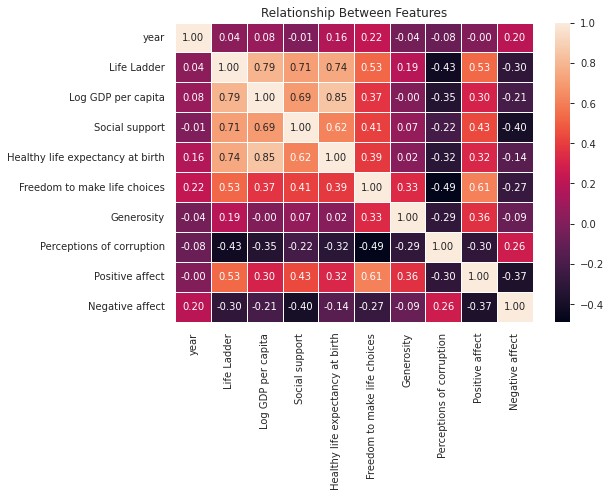

In [42]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.7)
plt.title("Relationship Between Features")
plt.show()

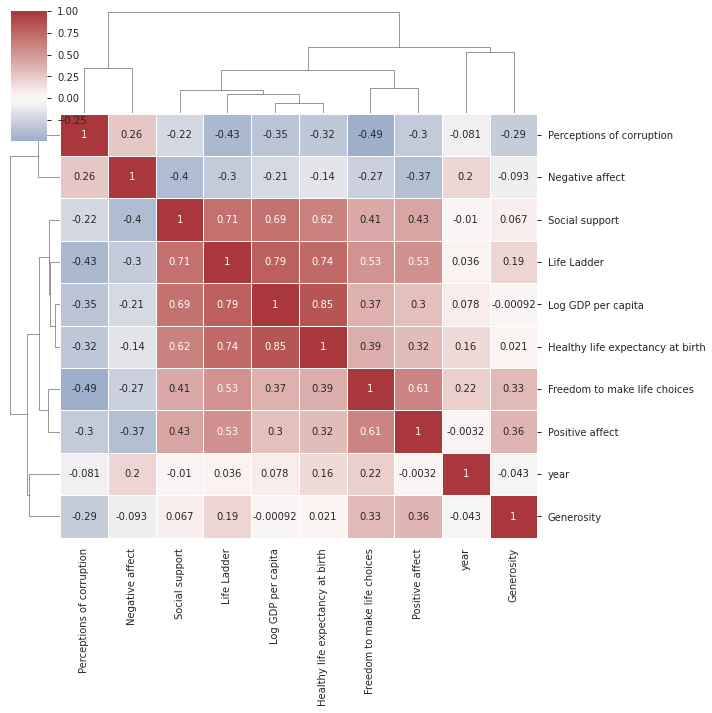

In [43]:
sns.clustermap(df.corr(), center=0, cmap='vlag', dendrogram_ratio=(0.1,0.2), annot=True, linewidth=0.7, figsize=(10,10))
plt.show()